In [2]:
import pandas as pd
pd.options.display.float_format='{:.4g}'.format

import numpy as np
RANDOM_SEED = 1234567890

import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
X_global_train = np.random.rand(2000,2)*500
y_global_train = X_global_train.dot(np.array([35, 80])) + 200
X_global_train.shape, y_global_train.shape


((2000, 2), (2000,))

In [63]:
X_train, X_valid, y_train, y_valid = sk.model_selection.train_test_split(X_global_train, 
                                                                        y_global_train, 
                                                                        train_size=0.80, 
                                                                        test_size=0.20,
                                                                        shuffle=True,
                                                                        random_state=None)

In [82]:
mod = ElasticNet(alpha=10, normalize=False, l1_ratio=0.9, max_iter=10000,
                 fit_intercept=True, tol=1e-8, random_state=None)
mod.fit(X_train, y_train)

ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=1e-08, warm_start=False)

In [83]:
y_pred = mod.predict(X_valid)
y_pred_train = mod.predict(X_train)

In [85]:
mod.coef_,  mod.intercept_, mod.score, mod.n_iter_

(array([34.99797804, 79.99568207]),
 201.57246383748497,
 <bound method RegressorMixin.score of ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.9,
       max_iter=10000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=1e-08, warm_start=False)>,
 5)

In [74]:
y_pred, y_valid

(array([38388.48829532, 29783.3720101 , 36173.24312493, 50030.40904574,
        36228.20259179, 49086.78092352, 27335.5917143 , 39025.79954529,
        34092.80895912, 49650.29537304, 21218.27744784, 28784.40214811,
        19093.85651638, 38357.05871189, 45180.03302931, 45969.67858813,
        29744.29068471, 17529.66226039, 43293.83856459, 49685.2933674 ,
        24535.85612095, 52176.86846586, 41590.05130235, 46325.88385909,
        26407.93847286, 30343.31526194, 35221.20273171, 32066.55463124,
        52045.19366743, 46935.4580249 , 18485.14417711, 30403.04760384,
        26578.57379899, 48412.93999193, 10678.39068004, 35573.22856376,
        21407.48943951, 19156.92689987, 27715.65995733, 42046.74425959,
        51804.61892538, 31095.58667228, 27561.97557871, 38708.33952806,
        33785.40445601, 21893.00664344, 28960.97161412, 26119.16473855,
        47647.6971739 , 28109.53653469, 12221.77126542, 18999.44708332,
        16013.97611806, 19452.22229815, 35451.94496544, 33697.47

In [68]:
y_pred_train, y_train

(array([29488.17845093, 17741.47692991,  5715.24288262, ...,
         3009.78569736, 18326.64328249, 32334.27748561]),
 array([29488.19000006, 17741.20783339,  5714.68431727, ...,
         3009.15968678, 18326.39001259, 32334.36324684]))

In [69]:
X_global_train

array([[355.65448925, 314.2601236 ],
       [157.55417665, 376.27374356],
       [212.6461737 , 495.93907407],
       ...,
       [446.58370816, 373.65890541],
       [291.9981689 , 221.81370266],
       [262.33858655, 180.910166  ]])

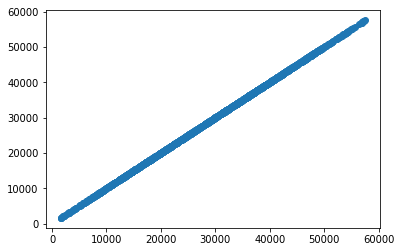

In [70]:
plt.clf()
plt.scatter(y_pred_train,y_train);